In [5]:
# ELO Merchant Category Recommendation - Exploratory Data Analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime as dt
from tqdm import tqdm
import gc

In [7]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

# Define paths
DATA_PATH = '../data/raw/'


=== Loading Training Data ===
Train set shape: (201917, 6)

=== Training Data Overview ===
  first_active_month          card_id  feature_1  feature_2  feature_3  target
0            2017-06  C_ID_92a2005557          5          2          1  -0.820
1            2017-01  C_ID_3d0044924f          4          1          0   0.393
2            2016-08  C_ID_d639edf6cd          2          2          0   0.688
3            2017-09  C_ID_186d6a6901          4          3          0   0.142
4            2017-11  C_ID_cdbd2c0db2          1          3          0  -0.160

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4 

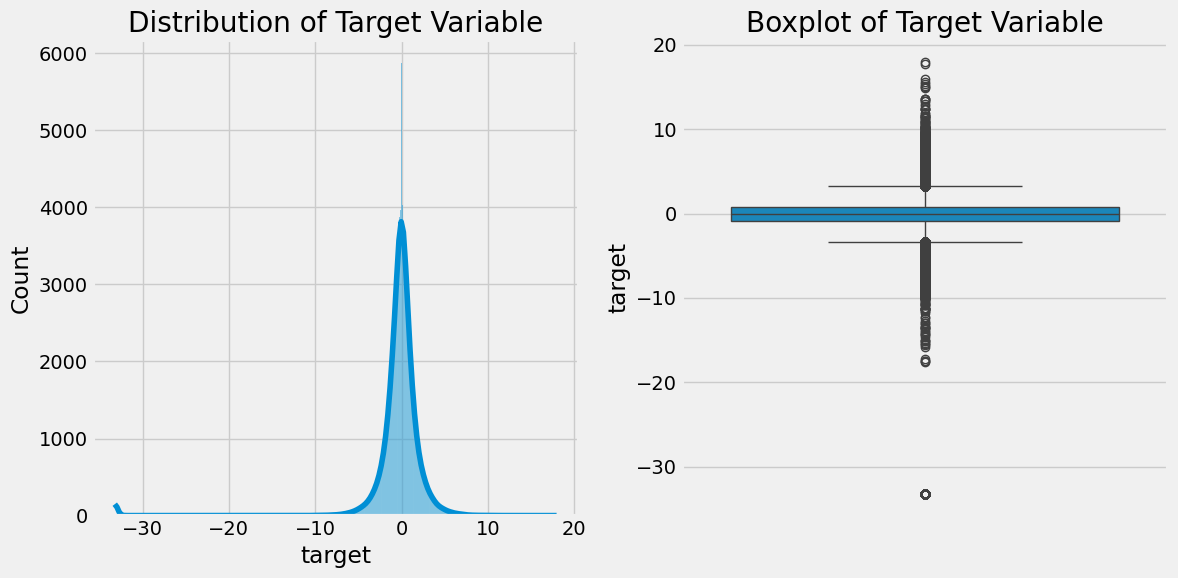

Target Variable Statistics:
Mean: -0.3936
Median: -0.0234
Min: -33.2193
Max: 17.9651
Std Dev: 3.8505
25th Percentile: -0.8831
75th Percentile: 0.7655


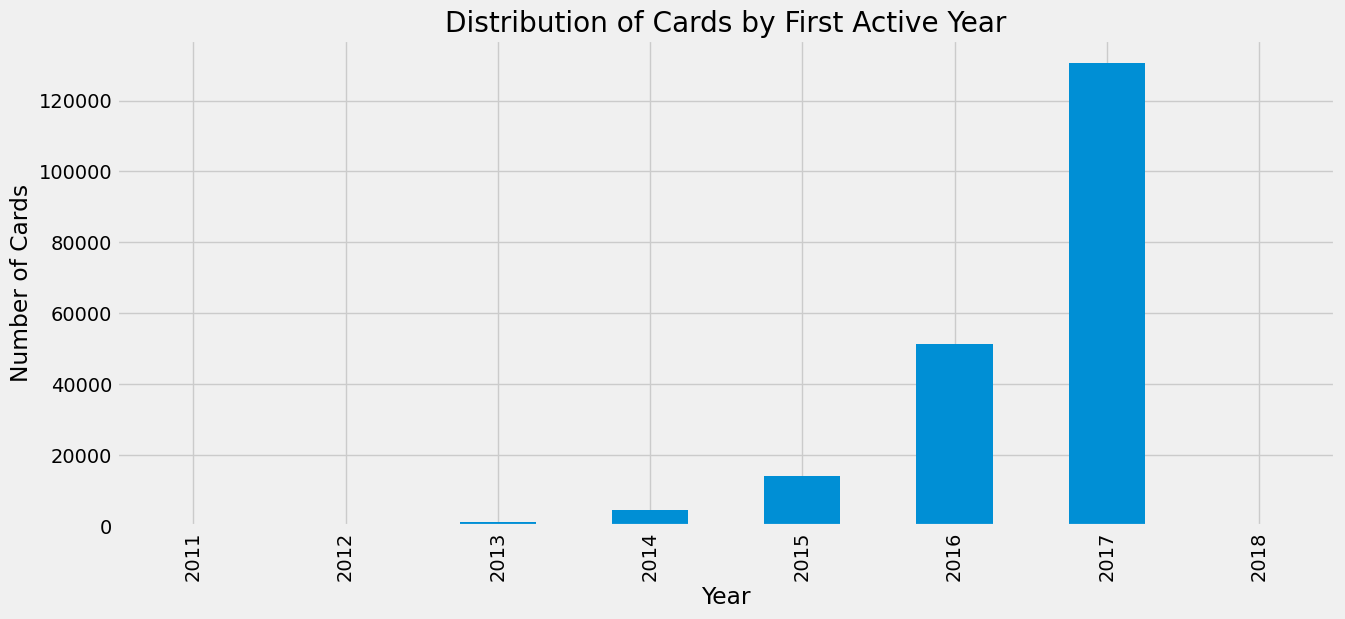

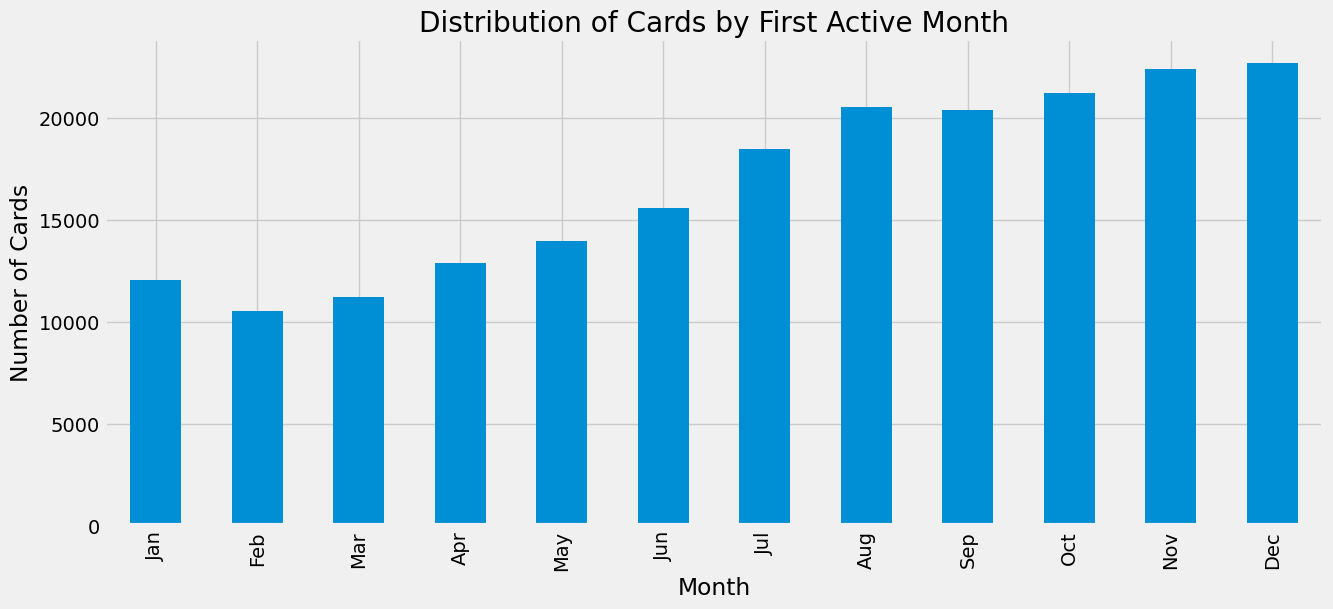


=== Train Data Summary ===
Shape: (201917, 6)
Columns: ['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target']
Target mean: -0.3936
Target std: 3.8505
Target min: -33.2193
Target max: 17.9651
Train data cleared from memory


In [8]:
#--------------------------------------------------
# 1. Analysis of Train Data
#--------------------------------------------------

# Cell: Load Train Data
print("\n=== Loading Training Data ===")
train = pd.read_csv(DATA_PATH + 'train.csv')
print(f"Train set shape: {train.shape}")

# Cell: Examine Training Data - Overview
print("\n=== Training Data Overview ===")
print(train.head())
print("\nColumn information:")
print(train.info())

# Cell: Examine Training Data - Statistics
print("\nStatistical summary:")
print(train.describe())

# Cell: Examine Training Data - Missing Values
print("\nMissing values in train data:")
print(train.isnull().sum())
print(f"Percentage of missing values: {train.isnull().sum() / len(train) * 100}")

# Cell: Target Variable Analysis - Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['target'], kde=True)
plt.title('Distribution of Target Variable')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['target'])
plt.title('Boxplot of Target Variable')
plt.tight_layout()
plt.show()

# Cell: Target Variable Analysis - Statistics
target_stats = {
    'Mean': train['target'].mean(),
    'Median': train['target'].median(),
    'Min': train['target'].min(),
    'Max': train['target'].max(),
    'Std Dev': train['target'].std(),
    '25th Percentile': train['target'].quantile(0.25),
    '75th Percentile': train['target'].quantile(0.75)
}
print("Target Variable Statistics:")
for stat, value in target_stats.items():
    print(f"{stat}: {value:.4f}")

# Cell: Examine train first_active_month
if 'first_active_month' in train.columns:
    # Convert to datetime
    train['first_active_month'] = pd.to_datetime(train['first_active_month'])
    
    # Plot distribution by month
    plt.figure(figsize=(14, 6))
    train['first_active_month'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Cards by First Active Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Cards')
    plt.show()
    
    plt.figure(figsize=(14, 6))
    train['first_active_month'].dt.month.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Cards by First Active Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Cards')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

# Cell: Save key insights from train
# Save important information before clearing
train_card_ids = train['card_id'].copy()
train_targets = train['target'].copy()
train_shape = train.shape
train_columns = train.columns.tolist()

# Summary of train data
print("\n=== Train Data Summary ===")
print(f"Shape: {train_shape}")
print(f"Columns: {train_columns}")
print(f"Target mean: {train_targets.mean():.4f}")
print(f"Target std: {train_targets.std():.4f}")
print(f"Target min: {train_targets.min():.4f}")
print(f"Target max: {train_targets.max():.4f}")

# Clear memory
del train
gc.collect()
print("Train data cleared from memory")

In [ ]:
#--------------------------------------------------
# 2. Analysis of Test Data
#--------------------------------------------------

# Cell: Load Test Data
print("\n=== Loading Test Data ===")
test = pd.read_csv(DATA_PATH + 'test.csv')
print(f"Test set shape: {test.shape}")

# Cell: Examine Test Data - Overview
print("\n=== Test Data Overview ===")
print(test.head())
print("\nColumn information:")
print(test.info())

# Cell: Examine Test Data - Missing Values
print("\nMissing values in test data:")
print(test.isnull().sum())
print(f"Percentage of missing values: {test.isnull().sum() / len(test) * 100}")

# Cell: Examine test first_active_month
if 'first_active_month' in test.columns:
    # Convert to datetime
    test['first_active_month'] = pd.to_datetime(test['first_active_month'])
    
    # Plot distribution by month
    plt.figure(figsize=(14, 6))
    test['first_active_month'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Test Cards by First Active Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Cards')
    plt.show()

# Cell: Save key insights from test
test_card_ids = test['card_id'].copy()
test_shape = test.shape
test_columns = test.columns.tolist()

# Summary of test data
print("\n=== Test Data Summary ===")
print(f"Shape: {test_shape}")
print(f"Columns: {test_columns}")

# Clear memory
del test
gc.collect()
print("Test data cleared from memory")

In [ ]:
#--------------------------------------------------
# 3. Analysis of Merchants Data
#--------------------------------------------------

# Cell: Load Merchants Data
print("\n=== Loading Merchants Data ===")
merchants = pd.read_csv(DATA_PATH + 'merchants.csv')
print(f"Merchants shape: {merchants.shape}")

# Cell: Examine Merchants Data - Overview
print("\n=== Merchants Data Overview ===")
print(merchants.head())
print("\nColumn information:")
print(merchants.info())

# Cell: Examine Merchants Data - Statistics
print("\nStatistical summary (numeric columns):")
print(merchants.describe())

# Cell: Examine Merchants Data - Missing Values
print("\nMissing values in merchants data:")
missing_merchants = merchants.isnull().sum()
print(missing_merchants)
print(f"Percentage of missing values: {missing_merchants / len(merchants) * 100}")

# Cell: Explore Merchant Categories
# Check merchant categories
plt.figure(figsize=(12, 6))
if 'category_1' in merchants.columns:
    merchants['category_1'].value_counts().plot(kind='bar')
    plt.title('Distribution of Merchant Category 1')
    plt.ylabel('Count')
    plt.show()
    
    # Print percentages
    cat1_pct = merchants['category_1'].value_counts(normalize=True) * 100
    print("Category 1 Distribution (%):")
    print(cat1_pct)

# Cell: Explore More Merchant Categories
if 'category_2' in merchants.columns:
    plt.figure(figsize=(12, 6))
    merchants['category_2'].value_counts().plot(kind='bar')
    plt.title('Distribution of Merchant Category 2')
    plt.ylabel('Count')
    plt.show()
    
    # Print percentages
    cat2_pct = merchants['category_2'].value_counts(normalize=True) * 100
    print("Category 2 Distribution (%):")
    print(cat2_pct)

if 'category_3' in merchants.columns:
    plt.figure(figsize=(12, 6))
    merchants['category_3'].value_counts().plot(kind='bar')
    plt.title('Distribution of Merchant Category 3')
    plt.ylabel('Count')
    plt.show()
    
    # Print percentages
    cat3_pct = merchants['category_3'].value_counts(normalize=True) * 100
    print("Category 3 Distribution (%):")
    print(cat3_pct)

# Cell: Explore Merchant Category Combinations
if 'category_1' in merchants.columns and 'category_2' in merchants.columns:
    # Create cross-tabulation
    category_crosstab = pd.crosstab(
        merchants['category_1'], 
        merchants['category_2'],
        normalize='all'
    ) * 100
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(category_crosstab, annot=True, cmap='YlGnBu', fmt='.1f')
    plt.title('Percentage Distribution of Category 1 vs Category 2')
    plt.show()

# Cell: Save key insights from merchants
merchant_ids = merchants['merchant_id'].copy()
merchant_shape = merchants.shape
merchant_columns = merchants.columns.tolist()

# Summary of merchants data
print("\n=== Merchants Data Summary ===")
print(f"Shape: {merchant_shape}")
print(f"Columns: {merchant_columns}")
print(f"Number of unique merchants: {len(merchant_ids)}")

# Clear memory
del merchants
gc.collect()
print("Merchants data cleared from memory")

In [ ]:
#--------------------------------------------------
# 4. Analysis of Historical Transactions
#--------------------------------------------------

# Cell: Load Historical Transactions Data
print("\n=== Loading Historical Transactions Data ===")
historical_transactions = pd.read_csv(DATA_PATH + 'historical_transactions.csv')
print(f"Historical transactions shape: {historical_transactions.shape}")

# Cell: Examine Historical Transactions - Overview
print("\n=== Historical Transactions Overview ===")
print(historical_transactions.head())
print("\nColumn information:")
print(historical_transactions.info())

# Cell: Examine Historical Transactions - Missing Values
print("\nMissing values in historical transactions:")
missing_hist = historical_transactions.isnull().sum()
print(missing_hist)
print(f"Percentage of missing values: {missing_hist / len(historical_transactions) * 100}")

# Cell: Sample Historical Transactions for Analysis
# Sample a subset for faster analysis if the dataset is large
if len(historical_transactions) > 500000:
    hist_sample = historical_transactions.sample(500000, random_state=42)
    print(f"Working with sample of {len(hist_sample)} records")
else:
    hist_sample = historical_transactions
    print(f"Working with all {len(hist_sample)} records")

# Cell: Statistical Summary of Numerical Columns
numeric_cols = hist_sample.select_dtypes(include=['int64', 'float64']).columns
print("\nStatistical summary of numerical columns:")
print(hist_sample[numeric_cols].describe())

# Cell: Time Analysis - Purchase Dates
# Convert purchase date to datetime if it exists
if 'purchase_date' in hist_sample.columns:
    hist_sample['purchase_date'] = pd.to_datetime(hist_sample['purchase_date'])
    
    # Extract more temporal features
    hist_sample['purchase_month'] = hist_sample['purchase_date'].dt.month
    hist_sample['purchase_day'] = hist_sample['purchase_date'].dt.day
    hist_sample['purchase_dayofweek'] = hist_sample['purchase_date'].dt.dayofweek
    
    # Analyze purchase patterns over time
    plt.figure(figsize=(14, 6))
    hist_sample.groupby(hist_sample['purchase_date'].dt.date).size().plot()
    plt.title('Transaction Volume Over Time')
    plt.ylabel('Number of Transactions')
    plt.xlabel('Date')
    plt.show()
    
    # Analyze by day of week
    plt.figure(figsize=(12, 6))
    day_counts = hist_sample['purchase_dayofweek'].value_counts().sort_index()
    day_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    day_counts.plot(kind='bar')
    plt.title('Transactions by Day of Week')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    # Analyze by month
    plt.figure(figsize=(12, 6))
    month_counts = hist_sample['purchase_month'].value_counts().sort_index()
    month_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_counts.plot(kind='bar')
    plt.title('Transactions by Month')
    plt.ylabel('Number of Transactions')
    plt.show()

# Cell: Purchase Amount Analysis
if 'purchase_amount' in hist_sample.columns:
    # Overview of purchase amounts
    purchase_stats = hist_sample['purchase_amount'].describe()
    print("Purchase Amount Statistics:")
    print(purchase_stats)
    
    # Distribution of purchase amounts
    plt.figure(figsize=(12, 6))
    sns.histplot(hist_sample['purchase_amount'], kde=True, bins=50)
    plt.title('Distribution of Purchase Amounts')
    plt.xlabel('Purchase Amount')
    plt.show()
    
    # Box plot of purchase amounts
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=hist_sample['purchase_amount'])
    plt.title('Boxplot of Purchase Amounts')
    plt.ylabel('Purchase Amount')
    plt.show()
    
    # Log-transformed purchase amounts for better visualization
    plt.figure(figsize=(12, 6))
    sns.histplot(np.log1p(hist_sample['purchase_amount'].abs()), kde=True, bins=50)
    plt.title('Distribution of Log-Transformed Purchase Amounts')
    plt.xlabel('Log(Purchase Amount + 1)')
    plt.show()

# Cell: Analyze Authorizations and Categories
# Check for authorized_flag if it exists
if 'authorized_flag' in hist_sample.columns:
    auth_counts = hist_sample['authorized_flag'].value_counts()
    print("Authorization Distribution:")
    print(auth_counts)
    print(f"Percentage authorized: {auth_counts[1] / len(hist_sample) * 100:.2f}%")
    
    plt.figure(figsize=(8, 6))
    auth_counts.plot(kind='bar')
    plt.title('Transaction Authorization Distribution')
    plt.ylabel('Count')
    plt.show()

# Check for category_1 if it exists
if 'category_1' in hist_sample.columns:
    cat1_counts = hist_sample['category_1'].value_counts()
    print("Category 1 Distribution:")
    print(cat1_counts)
    
    plt.figure(figsize=(8, 6))
    cat1_counts.plot(kind='bar')
    plt.title('Transaction Category 1 Distribution')
    plt.ylabel('Count')
    plt.show()

# Cell: Transaction per Card Analysis
# Calculate number of transactions per card
card_transaction_counts = hist_sample['card_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(card_transaction_counts, bins=50, kde=True)
plt.title('Distribution of Transactions per Card')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Cards')
plt.show()

print("Transactions per Card Statistics:")
print(card_transaction_counts.describe())

# Cell: Basic feature aggregation to understand relationship with train target
if 'train_targets' in locals() and 'train_card_ids' in locals():
    print("\n=== Relationship between transactions and target ===")
    
    # Creating a small sample for memory efficiency
    if len(hist_sample) > 100000:
        hist_feat_sample = hist_sample.sample(100000, random_state=42)
    else:
        hist_feat_sample = hist_sample
    
    # Basic aggregation by card_id
    card_aggs = hist_feat_sample.groupby('card_id').agg({
        'purchase_amount': ['mean', 'sum', 'count', 'std'],
    }).reset_index()
    
    # Flatten the column names
    card_aggs.columns = ['_'.join(col).strip() if col[1] else col[0] for col in card_aggs.columns.values]
    
    # Create a dataframe with targets
    targets_df = pd.DataFrame({
        'card_id': train_card_ids,
        'target': train_targets
    })
    
    # Merge with the aggregated features
    merged_df = pd.merge(card_aggs, targets_df, on='card_id', how='inner')
    print(f"Shape after merging with target: {merged_df.shape}")
    
    # Show correlation with target
    if len(merged_df) > 0:
        print("\nCorrelation with target:")
        corr_with_target = merged_df.corr()['target'].sort_values(ascending=False)
        print(corr_with_target)
        
        plt.figure(figsize=(10, 6))
        corr_with_target[corr_with_target.index != 'target'].plot(kind='bar')
        plt.title('Correlation of Transaction Aggregates with Target')
        plt.ylabel('Correlation Coefficient')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Cell: Save key insights from historical transactions
hist_trans_shape = historical_transactions.shape
hist_trans_columns = historical_transactions.columns.tolist()
num_unique_cards = historical_transactions['card_id'].nunique()

# Summary of historical transactions data
print("\n=== Historical Transactions Summary ===")
print(f"Shape: {hist_trans_shape}")
print(f"Columns: {hist_trans_columns}")
print(f"Number of unique cards: {num_unique_cards}")
print(f"Average transactions per card: {len(historical_transactions) / num_unique_cards:.2f}")

# Clear memory
del historical_transactions
del hist_sample
if 'hist_feat_sample' in locals():
    del hist_feat_sample
if 'merged_df' in locals():
    del merged_df
if 'card_aggs' in locals():
    del card_aggs
gc.collect()
print("Historical transactions data cleared from memory")

In [ ]:
#--------------------------------------------------
# 4. Analysis of Historical Transactions
#--------------------------------------------------

# Cell: Load Historical Transactions Data
print("\n=== Loading Historical Transactions Data ===")
historical_transactions = pd.read_csv(DATA_PATH + 'historical_transactions.csv')
print(f"Historical transactions shape: {historical_transactions.shape}")

# Cell: Examine Historical Transactions - Overview
print("\n=== Historical Transactions Overview ===")
print(historical_transactions.head())
print("\nColumn information:")
print(historical_transactions.info())

# Cell: Examine Historical Transactions - Missing Values
print("\nMissing values in historical transactions:")
missing_hist = historical_transactions.isnull().sum()
print(missing_hist)
print(f"Percentage of missing values: {missing_hist / len(historical_transactions) * 100}")

# Cell: Sample Historical Transactions for Analysis
# Sample a subset for faster analysis if the dataset is large
if len(historical_transactions) > 500000:
    hist_sample = historical_transactions.sample(500000, random_state=42)
    print(f"Working with sample of {len(hist_sample)} records")
else:
    hist_sample = historical_transactions
    print(f"Working with all {len(hist_sample)} records")

# Cell: Statistical Summary of Numerical Columns
numeric_cols = hist_sample.select_dtypes(include=['int64', 'float64']).columns
print("\nStatistical summary of numerical columns:")
print(hist_sample[numeric_cols].describe())

# Cell: Time Analysis - Purchase Dates
# Convert purchase date to datetime if it exists
if 'purchase_date' in hist_sample.columns:
    hist_sample['purchase_date'] = pd.to_datetime(hist_sample['purchase_date'])
    
    # Extract more temporal features
    hist_sample['purchase_month'] = hist_sample['purchase_date'].dt.month
    hist_sample['purchase_day'] = hist_sample['purchase_date'].dt.day
    hist_sample['purchase_dayofweek'] = hist_sample['purchase_date'].dt.dayofweek
    
    # Analyze purchase patterns over time
    plt.figure(figsize=(14, 6))
    hist_sample.groupby(hist_sample['purchase_date'].dt.date).size().plot()
    plt.title('Transaction Volume Over Time')
    plt.ylabel('Number of Transactions')
    plt.xlabel('Date')
    plt.show()
    
    # Analyze by day of week
    plt.figure(figsize=(12, 6))
    day_counts = hist_sample['purchase_dayofweek'].value_counts().sort_index()
    day_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    day_counts.plot(kind='bar')
    plt.title('Transactions by Day of Week')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    # Analyze by month
    plt.figure(figsize=(12, 6))
    month_counts = hist_sample['purchase_month'].value_counts().sort_index()
    month_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_counts.plot(kind='bar')
    plt.title('Transactions by Month')
    plt.ylabel('Number of Transactions')
    plt.show()

# Cell: Purchase Amount Analysis
if 'purchase_amount' in hist_sample.columns:
    # Overview of purchase amounts
    purchase_stats = hist_sample['purchase_amount'].describe()
    print("Purchase Amount Statistics:")
    print(purchase_stats)
    
    # Distribution of purchase amounts
    plt.figure(figsize=(12, 6))
    sns.histplot(hist_sample['purchase_amount'], kde=True, bins=50)
    plt.title('Distribution of Purchase Amounts')
    plt.xlabel('Purchase Amount')
    plt.show()
    
    # Box plot of purchase amounts
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=hist_sample['purchase_amount'])
    plt.title('Boxplot of Purchase Amounts')
    plt.ylabel('Purchase Amount')
    plt.show()
    
    # Log-transformed purchase amounts for better visualization
    plt.figure(figsize=(12, 6))
    sns.histplot(np.log1p(hist_sample['purchase_amount'].abs()), kde=True, bins=50)
    plt.title('Distribution of Log-Transformed Purchase Amounts')
    plt.xlabel('Log(Purchase Amount + 1)')
    plt.show()

# Cell: Analyze Authorizations and Categories
# Check for authorized_flag if it exists
if 'authorized_flag' in hist_sample.columns:
    auth_counts = hist_sample['authorized_flag'].value_counts()
    print("Authorization Distribution:")
    print(auth_counts)
    print(f"Percentage authorized: {auth_counts[1] / len(hist_sample) * 100:.2f}%")
    
    plt.figure(figsize=(8, 6))
    auth_counts.plot(kind='bar')
    plt.title('Transaction Authorization Distribution')
    plt.ylabel('Count')
    plt.show()

# Check for category_1 if it exists
if 'category_1' in hist_sample.columns:
    cat1_counts = hist_sample['category_1'].value_counts()
    print("Category 1 Distribution:")
    print(cat1_counts)
    
    plt.figure(figsize=(8, 6))
    cat1_counts.plot(kind='bar')
    plt.title('Transaction Category 1 Distribution')
    plt.ylabel('Count')
    plt.show()

# Cell: Transaction per Card Analysis
# Calculate number of transactions per card
card_transaction_counts = hist_sample['card_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(card_transaction_counts, bins=50, kde=True)
plt.title('Distribution of Transactions per Card')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Cards')
plt.show()

print("Transactions per Card Statistics:")
print(card_transaction_counts.describe())

# Cell: Basic feature aggregation to understand relationship with train target
if 'train_targets' in locals() and 'train_card_ids' in locals():
    print("\n=== Relationship between transactions and target ===")
    
    # Creating a small sample for memory efficiency
    if len(hist_sample) > 100000:
        hist_feat_sample = hist_sample.sample(100000, random_state=42)
    else:
        hist_feat_sample = hist_sample
    
    # Basic aggregation by card_id
    card_aggs = hist_feat_sample.groupby('card_id').agg({
        'purchase_amount': ['mean', 'sum', 'count', 'std'],
    }).reset_index()
    
    # Flatten the column names
    card_aggs.columns = ['_'.join(col).strip() if col[1] else col[0] for col in card_aggs.columns.values]
    
    # Create a dataframe with targets
    targets_df = pd.DataFrame({
        'card_id': train_card_ids,
        'target': train_targets
    })
    
    # Merge with the aggregated features
    merged_df = pd.merge(card_aggs, targets_df, on='card_id', how='inner')
    print(f"Shape after merging with target: {merged_df.shape}")
    
    # Show correlation with target
    if len(merged_df) > 0:
        print("\nCorrelation with target:")
        corr_with_target = merged_df.corr()['target'].sort_values(ascending=False)
        print(corr_with_target)
        
        plt.figure(figsize=(10, 6))
        corr_with_target[corr_with_target.index != 'target'].plot(kind='bar')
        plt.title('Correlation of Transaction Aggregates with Target')
        plt.ylabel('Correlation Coefficient')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Cell: Save key insights from historical transactions
hist_trans_shape = historical_transactions.shape
hist_trans_columns = historical_transactions.columns.tolist()
num_unique_cards = historical_transactions['card_id'].nunique()

# Summary of historical transactions data
print("\n=== Historical Transactions Summary ===")
print(f"Shape: {hist_trans_shape}")
print(f"Columns: {hist_trans_columns}")
print(f"Number of unique cards: {num_unique_cards}")
print(f"Average transactions per card: {len(historical_transactions) / num_unique_cards:.2f}")

# Clear memory
del historical_transactions
del hist_sample
if 'hist_feat_sample' in locals():
    del hist_feat_sample
if 'merged_df' in locals():
    del merged_df
if 'card_aggs' in locals():
    del card_aggs
gc.collect()
print("Historical transactions data cleared from memory")

In [ ]:
# ELO Merchant Category Recommendation - Exploratory Data Analysis
# Memory-Efficient Approach: Load, analyze, and clear each dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime as dt
from tqdm import tqdm
import gc  # For garbage collection

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

# Define paths
DATA_PATH = '../data/raw/'

#--------------------------------------------------
# 1. Analysis of Train Data
#--------------------------------------------------

# Cell: Load Train Data
print("\n=== Loading Training Data ===")
train = pd.read_csv(DATA_PATH + 'train.csv')
print(f"Train set shape: {train.shape}")

# Cell: Examine Training Data - Overview
print("\n=== Training Data Overview ===")
print(train.head())
print("\nColumn information:")
print(train.info())

# Cell: Examine Training Data - Statistics
print("\nStatistical summary:")
print(train.describe())

# Cell: Examine Training Data - Missing Values
print("\nMissing values in train data:")
print(train.isnull().sum())
print(f"Percentage of missing values: {train.isnull().sum() / len(train) * 100}")

# Cell: Target Variable Analysis - Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['target'], kde=True)
plt.title('Distribution of Target Variable')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['target'])
plt.title('Boxplot of Target Variable')
plt.tight_layout()
plt.show()

# Cell: Target Variable Analysis - Statistics
target_stats = {
    'Mean': train['target'].mean(),
    'Median': train['target'].median(),
    'Min': train['target'].min(),
    'Max': train['target'].max(),
    'Std Dev': train['target'].std(),
    '25th Percentile': train['target'].quantile(0.25),
    '75th Percentile': train['target'].quantile(0.75)
}
print("Target Variable Statistics:")
for stat, value in target_stats.items():
    print(f"{stat}: {value:.4f}")

# Cell: Examine train first_active_month
if 'first_active_month' in train.columns:
    # Convert to datetime
    train['first_active_month'] = pd.to_datetime(train['first_active_month'])
    
    # Plot distribution by month
    plt.figure(figsize=(14, 6))
    train['first_active_month'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Cards by First Active Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Cards')
    plt.show()
    
    plt.figure(figsize=(14, 6))
    train['first_active_month'].dt.month.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Cards by First Active Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Cards')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

# Cell: Save key insights from train
# Save important information before clearing
train_card_ids = train['card_id'].copy()
train_targets = train['target'].copy()
train_shape = train.shape
train_columns = train.columns.tolist()

# Summary of train data
print("\n=== Train Data Summary ===")
print(f"Shape: {train_shape}")
print(f"Columns: {train_columns}")
print(f"Target mean: {train_targets.mean():.4f}")
print(f"Target std: {train_targets.std():.4f}")
print(f"Target min: {train_targets.min():.4f}")
print(f"Target max: {train_targets.max():.4f}")

# Clear memory
del train
gc.collect()
print("Train data cleared from memory")

#--------------------------------------------------
# 2. Analysis of Test Data
#--------------------------------------------------

# Cell: Load Test Data
print("\n=== Loading Test Data ===")
test = pd.read_csv(DATA_PATH + 'test.csv')
print(f"Test set shape: {test.shape}")

# Cell: Examine Test Data - Overview
print("\n=== Test Data Overview ===")
print(test.head())
print("\nColumn information:")
print(test.info())

# Cell: Examine Test Data - Missing Values
print("\nMissing values in test data:")
print(test.isnull().sum())
print(f"Percentage of missing values: {test.isnull().sum() / len(test) * 100}")

# Cell: Examine test first_active_month
if 'first_active_month' in test.columns:
    # Convert to datetime
    test['first_active_month'] = pd.to_datetime(test['first_active_month'])
    
    # Plot distribution by month
    plt.figure(figsize=(14, 6))
    test['first_active_month'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Test Cards by First Active Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Cards')
    plt.show()

# Cell: Save key insights from test
test_card_ids = test['card_id'].copy()
test_shape = test.shape
test_columns = test.columns.tolist()

# Summary of test data
print("\n=== Test Data Summary ===")
print(f"Shape: {test_shape}")
print(f"Columns: {test_columns}")

# Clear memory
del test
gc.collect()
print("Test data cleared from memory")

#--------------------------------------------------
# 3. Analysis of Merchants Data
#--------------------------------------------------

# Cell: Load Merchants Data
print("\n=== Loading Merchants Data ===")
merchants = pd.read_csv(DATA_PATH + 'merchants.csv')
print(f"Merchants shape: {merchants.shape}")

# Cell: Examine Merchants Data - Overview
print("\n=== Merchants Data Overview ===")
print(merchants.head())
print("\nColumn information:")
print(merchants.info())

# Cell: Examine Merchants Data - Statistics
print("\nStatistical summary (numeric columns):")
print(merchants.describe())

# Cell: Examine Merchants Data - Missing Values
print("\nMissing values in merchants data:")
missing_merchants = merchants.isnull().sum()
print(missing_merchants)
print(f"Percentage of missing values: {missing_merchants / len(merchants) * 100}")

# Cell: Explore Merchant Categories
# Check merchant categories
plt.figure(figsize=(12, 6))
if 'category_1' in merchants.columns:
    merchants['category_1'].value_counts().plot(kind='bar')
    plt.title('Distribution of Merchant Category 1')
    plt.ylabel('Count')
    plt.show()
    
    # Print percentages
    cat1_pct = merchants['category_1'].value_counts(normalize=True) * 100
    print("Category 1 Distribution (%):")
    print(cat1_pct)

# Cell: Explore More Merchant Categories
if 'category_2' in merchants.columns:
    plt.figure(figsize=(12, 6))
    merchants['category_2'].value_counts().plot(kind='bar')
    plt.title('Distribution of Merchant Category 2')
    plt.ylabel('Count')
    plt.show()
    
    # Print percentages
    cat2_pct = merchants['category_2'].value_counts(normalize=True) * 100
    print("Category 2 Distribution (%):")
    print(cat2_pct)

if 'category_3' in merchants.columns:
    plt.figure(figsize=(12, 6))
    merchants['category_3'].value_counts().plot(kind='bar')
    plt.title('Distribution of Merchant Category 3')
    plt.ylabel('Count')
    plt.show()
    
    # Print percentages
    cat3_pct = merchants['category_3'].value_counts(normalize=True) * 100
    print("Category 3 Distribution (%):")
    print(cat3_pct)

# Cell: Explore Merchant Category Combinations
if 'category_1' in merchants.columns and 'category_2' in merchants.columns:
    # Create cross-tabulation
    category_crosstab = pd.crosstab(
        merchants['category_1'], 
        merchants['category_2'],
        normalize='all'
    ) * 100
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(category_crosstab, annot=True, cmap='YlGnBu', fmt='.1f')
    plt.title('Percentage Distribution of Category 1 vs Category 2')
    plt.show()

# Cell: Save key insights from merchants
merchant_ids = merchants['merchant_id'].copy()
merchant_shape = merchants.shape
merchant_columns = merchants.columns.tolist()

# Summary of merchants data
print("\n=== Merchants Data Summary ===")
print(f"Shape: {merchant_shape}")
print(f"Columns: {merchant_columns}")
print(f"Number of unique merchants: {len(merchant_ids)}")

# Clear memory
del merchants
gc.collect()
print("Merchants data cleared from memory")

#--------------------------------------------------
# 4. Analysis of Historical Transactions
#--------------------------------------------------

# Cell: Load Historical Transactions Data
print("\n=== Loading Historical Transactions Data ===")
historical_transactions = pd.read_csv(DATA_PATH + 'historical_transactions.csv')
print(f"Historical transactions shape: {historical_transactions.shape}")

# Cell: Examine Historical Transactions - Overview
print("\n=== Historical Transactions Overview ===")
print(historical_transactions.head())
print("\nColumn information:")
print(historical_transactions.info())

# Cell: Examine Historical Transactions - Missing Values
print("\nMissing values in historical transactions:")
missing_hist = historical_transactions.isnull().sum()
print(missing_hist)
print(f"Percentage of missing values: {missing_hist / len(historical_transactions) * 100}")

# Cell: Sample Historical Transactions for Analysis
# Sample a subset for faster analysis if the dataset is large
if len(historical_transactions) > 500000:
    hist_sample = historical_transactions.sample(500000, random_state=42)
    print(f"Working with sample of {len(hist_sample)} records")
else:
    hist_sample = historical_transactions
    print(f"Working with all {len(hist_sample)} records")

# Cell: Statistical Summary of Numerical Columns
numeric_cols = hist_sample.select_dtypes(include=['int64', 'float64']).columns
print("\nStatistical summary of numerical columns:")
print(hist_sample[numeric_cols].describe())

# Cell: Time Analysis - Purchase Dates
# Convert purchase date to datetime if it exists
if 'purchase_date' in hist_sample.columns:
    hist_sample['purchase_date'] = pd.to_datetime(hist_sample['purchase_date'])
    
    # Extract more temporal features
    hist_sample['purchase_month'] = hist_sample['purchase_date'].dt.month
    hist_sample['purchase_day'] = hist_sample['purchase_date'].dt.day
    hist_sample['purchase_dayofweek'] = hist_sample['purchase_date'].dt.dayofweek
    
    # Analyze purchase patterns over time
    plt.figure(figsize=(14, 6))
    hist_sample.groupby(hist_sample['purchase_date'].dt.date).size().plot()
    plt.title('Transaction Volume Over Time')
    plt.ylabel('Number of Transactions')
    plt.xlabel('Date')
    plt.show()
    
    # Analyze by day of week
    plt.figure(figsize=(12, 6))
    day_counts = hist_sample['purchase_dayofweek'].value_counts().sort_index()
    day_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    day_counts.plot(kind='bar')
    plt.title('Transactions by Day of Week')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    # Analyze by month
    plt.figure(figsize=(12, 6))
    month_counts = hist_sample['purchase_month'].value_counts().sort_index()
    month_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_counts.plot(kind='bar')
    plt.title('Transactions by Month')
    plt.ylabel('Number of Transactions')
    plt.show()

# Cell: Purchase Amount Analysis
if 'purchase_amount' in hist_sample.columns:
    # Overview of purchase amounts
    purchase_stats = hist_sample['purchase_amount'].describe()
    print("Purchase Amount Statistics:")
    print(purchase_stats)
    
    # Distribution of purchase amounts
    plt.figure(figsize=(12, 6))
    sns.histplot(hist_sample['purchase_amount'], kde=True, bins=50)
    plt.title('Distribution of Purchase Amounts')
    plt.xlabel('Purchase Amount')
    plt.show()
    
    # Box plot of purchase amounts
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=hist_sample['purchase_amount'])
    plt.title('Boxplot of Purchase Amounts')
    plt.ylabel('Purchase Amount')
    plt.show()
    
    # Log-transformed purchase amounts for better visualization
    plt.figure(figsize=(12, 6))
    sns.histplot(np.log1p(hist_sample['purchase_amount'].abs()), kde=True, bins=50)
    plt.title('Distribution of Log-Transformed Purchase Amounts')
    plt.xlabel('Log(Purchase Amount + 1)')
    plt.show()

# Cell: Analyze Authorizations and Categories
# Check for authorized_flag if it exists
if 'authorized_flag' in hist_sample.columns:
    auth_counts = hist_sample['authorized_flag'].value_counts()
    print("Authorization Distribution:")
    print(auth_counts)
    print(f"Percentage authorized: {auth_counts[1] / len(hist_sample) * 100:.2f}%")
    
    plt.figure(figsize=(8, 6))
    auth_counts.plot(kind='bar')
    plt.title('Transaction Authorization Distribution')
    plt.ylabel('Count')
    plt.show()

# Check for category_1 if it exists
if 'category_1' in hist_sample.columns:
    cat1_counts = hist_sample['category_1'].value_counts()
    print("Category 1 Distribution:")
    print(cat1_counts)
    
    plt.figure(figsize=(8, 6))
    cat1_counts.plot(kind='bar')
    plt.title('Transaction Category 1 Distribution')
    plt.ylabel('Count')
    plt.show()

# Cell: Transaction per Card Analysis
# Calculate number of transactions per card
card_transaction_counts = hist_sample['card_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(card_transaction_counts, bins=50, kde=True)
plt.title('Distribution of Transactions per Card')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Cards')
plt.show()

print("Transactions per Card Statistics:")
print(card_transaction_counts.describe())

# Cell: Basic feature aggregation to understand relationship with train target
if 'train_targets' in locals() and 'train_card_ids' in locals():
    print("\n=== Relationship between transactions and target ===")
    
    # Creating a small sample for memory efficiency
    if len(hist_sample) > 100000:
        hist_feat_sample = hist_sample.sample(100000, random_state=42)
    else:
        hist_feat_sample = hist_sample
    
    # Basic aggregation by card_id
    card_aggs = hist_feat_sample.groupby('card_id').agg({
        'purchase_amount': ['mean', 'sum', 'count', 'std'],
    }).reset_index()
    
    # Flatten the column names
    card_aggs.columns = ['_'.join(col).strip() if col[1] else col[0] for col in card_aggs.columns.values]
    
    # Create a dataframe with targets
    targets_df = pd.DataFrame({
        'card_id': train_card_ids,
        'target': train_targets
    })
    
    # Merge with the aggregated features
    merged_df = pd.merge(card_aggs, targets_df, on='card_id', how='inner')
    print(f"Shape after merging with target: {merged_df.shape}")
    
    # Show correlation with target
    if len(merged_df) > 0:
        print("\nCorrelation with target:")
        corr_with_target = merged_df.corr()['target'].sort_values(ascending=False)
        print(corr_with_target)
        
        plt.figure(figsize=(10, 6))
        corr_with_target[corr_with_target.index != 'target'].plot(kind='bar')
        plt.title('Correlation of Transaction Aggregates with Target')
        plt.ylabel('Correlation Coefficient')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Cell: Save key insights from historical transactions
hist_trans_shape = historical_transactions.shape
hist_trans_columns = historical_transactions.columns.tolist()
num_unique_cards = historical_transactions['card_id'].nunique()

# Summary of historical transactions data
print("\n=== Historical Transactions Summary ===")
print(f"Shape: {hist_trans_shape}")
print(f"Columns: {hist_trans_columns}")
print(f"Number of unique cards: {num_unique_cards}")
print(f"Average transactions per card: {len(historical_transactions) / num_unique_cards:.2f}")

# Clear memory
del historical_transactions
del hist_sample
if 'hist_feat_sample' in locals():
    del hist_feat_sample
if 'merged_df' in locals():
    del merged_df
if 'card_aggs' in locals():
    del card_aggs
gc.collect()
print("Historical transactions data cleared from memory")

#--------------------------------------------------
# 5. Analysis of New Merchant Transactions
#--------------------------------------------------

# Cell: Load New Merchant Transactions Data
print("\n=== Loading New Merchant Transactions Data ===")
new_merchant_transactions = pd.read_csv(DATA_PATH + 'new_merchant_transactions.csv')
print(f"New merchant transactions shape: {new_merchant_transactions.shape}")

# Cell: Examine New Merchant Transactions - Overview
print("\n=== New Merchant Transactions Overview ===")
print(new_merchant_transactions.head())
print("\nColumn information:")
print(new_merchant_transactions.info())

# Cell: Examine New Merchant Transactions - Missing Values
print("\nMissing values in new merchant transactions:")
missing_new = new_merchant_transactions.isnull().sum()
print(missing_new)
print(f"Percentage of missing values: {missing_new / len(new_merchant_transactions) * 100}")

# Cell: Sample New Merchant Transactions for Analysis
# Sample a subset for faster analysis if the dataset is large
if len(new_merchant_transactions) > 500000:
    new_sample = new_merchant_transactions.sample(500000, random_state=42)
    print(f"Working with sample of {len(new_sample)} records")
else:
    new_sample = new_merchant_transactions
    print(f"Working with all {len(new_sample)} records")

# Cell: Statistical Summary of Numerical Columns
numeric_cols_new = new_sample.select_dtypes(include=['int64', 'float64']).columns
print("\nStatistical summary of numerical columns:")
print(new_sample[numeric_cols_new].describe())

# Cell: New Transactions - Purchase Amount Analysis
if 'purchase_amount' in new_sample.columns:
    # Overview of purchase amounts
    new_purchase_stats = new_sample['purchase_amount'].describe()
    print("New Merchant Purchase Amount Statistics:")
    print(new_purchase_stats)
    
    # Distribution of purchase amounts
    plt.figure(figsize=(12, 6))
    sns.histplot(new_sample['purchase_amount'], kde=True, bins=50)
    plt.title('Distribution of New Merchant Purchase Amounts')
    plt.xlabel('Purchase Amount')
    plt.show()
    
    # Log-transformed purchase amounts for better visualization
    plt.figure(figsize=(12, 6))
    sns.histplot(np.log1p(new_sample['purchase_amount'].abs()), kde=True, bins=50)
    plt.title('Distribution of Log-Transformed New Merchant Purchase Amounts')
    plt.xlabel('Log(Purchase Amount + 1)')
    plt.show()

# Cell: Analyze Authorizations and Categories
# Check for authorized_flag if it exists
if 'authorized_flag' in new_sample.columns:
    new_auth_counts = new_sample['authorized_flag'].value_counts()
    print("Authorization Distribution (New Merchants):")
    print(new_auth_counts)
    print(f"Percentage authorized: {new_auth_counts[1] / len(new_sample) * 100:.2f}%")
    
    plt.figure(figsize=(8, 6))
    new_auth_counts.plot(kind='bar')
    plt.title('New Merchant Transaction Authorization Distribution')
    plt.ylabel('Count')
    plt.show()

# Cell: Transaction per Card Analysis for New Merchants
# Calculate number of new transactions per card
new_card_transaction_counts = new_sample['card_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(new_card_transaction_counts, bins=50, kde=True)
plt.title('Distribution of New Merchant Transactions per Card')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Cards')
plt.show()

print("New Merchant Transactions per Card Statistics:")
print(new_card_transaction_counts.describe())

# Cell: Basic feature aggregation to understand relationship with train target
if 'train_targets' in locals() and 'train_card_ids' in locals():
    print("\n=== Relationship between new merchant transactions and target ===")
    
    # Creating a small sample for memory efficiency
    if len(new_sample) > 100000:
        new_feat_sample = new_sample.sample(100000, random_state=42)
    else:
        new_feat_sample = new_sample
    
    # Basic aggregation by card_id
    new_card_aggs = new_feat_sample.groupby('card_id').agg({
        'purchase_amount': ['mean', 'sum', 'count', 'std'],
    }).reset_index()
    
    # Flatten the column names
    new_card_aggs.columns = ['_'.join(col).strip() if col[1] else col[0] for col in new_card_aggs.columns.values]
    
    # Create a dataframe with targets
    targets_df = pd.DataFrame({
        'card_id': train_card_ids,
        'target': train_targets
    })
    
    # Merge with the aggregated features
    new_merged_df = pd.merge(new_card_aggs, targets_df, on='card_id', how='inner')
    print(f"Shape after merging with target: {new_merged_df.shape}")
    
    # Show correlation with target
    if len(new_merged_df) > 0:
        print("\nCorrelation with target:")
        new_corr_with_target = new_merged_df.corr()['target'].sort_values(ascending=False)
        print(new_corr_with_target)
        
        plt.figure(figsize=(10, 6))
        new_corr_with_target[new_corr_with_target.index != 'target'].plot(kind='bar')
        plt.title('Correlation of New Merchant Transaction Aggregates with Target')
        plt.ylabel('Correlation Coefficient')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Cell: Save key insights from new merchant transactions
new_trans_shape = new_merchant_transactions.shape
new_trans_columns = new_merchant_transactions.columns.tolist()
num_unique_cards_new = new_merchant_transactions['card_id'].nunique()

# Summary of new merchant transactions data
print("\n=== New Merchant Transactions Summary ===")
print(f"Shape: {new_trans_shape}")
print(f"Columns: {new_trans_columns}")
print(f"Number of unique cards: {num_unique_cards_new}")
print(f"Average new merchant transactions per card: {len(new_merchant_transactions) / num_unique_cards_new:.2f}")

# Clear memory
del new_merchant_transactions
del new_sample
if 'new_feat_sample' in locals():
    del new_feat_sample
if 'new_merged_df' in locals():
    del new_merged_df
if 'new_card_aggs' in locals():
    del new_card_aggs
gc.collect()
print("New merchant transactions data cleared from memory")

